<a href="https://colab.research.google.com/github/sandrarajp/hr-employee-attrition-prediction-dashboard/blob/main/HR_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [6]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8775510204081632
[[253   2]
 [ 34   5]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294



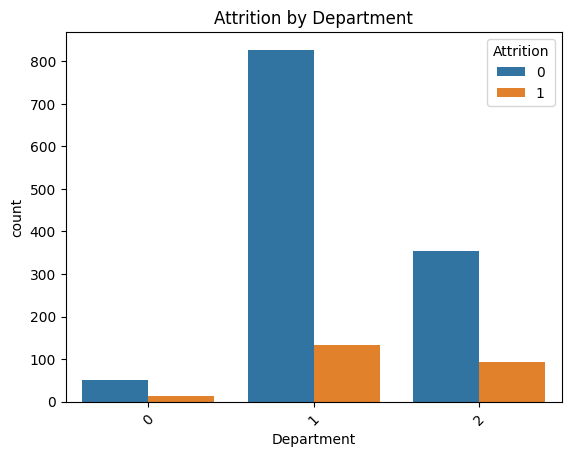

In [8]:
# Example: Plot attrition by department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Department')
plt.show()


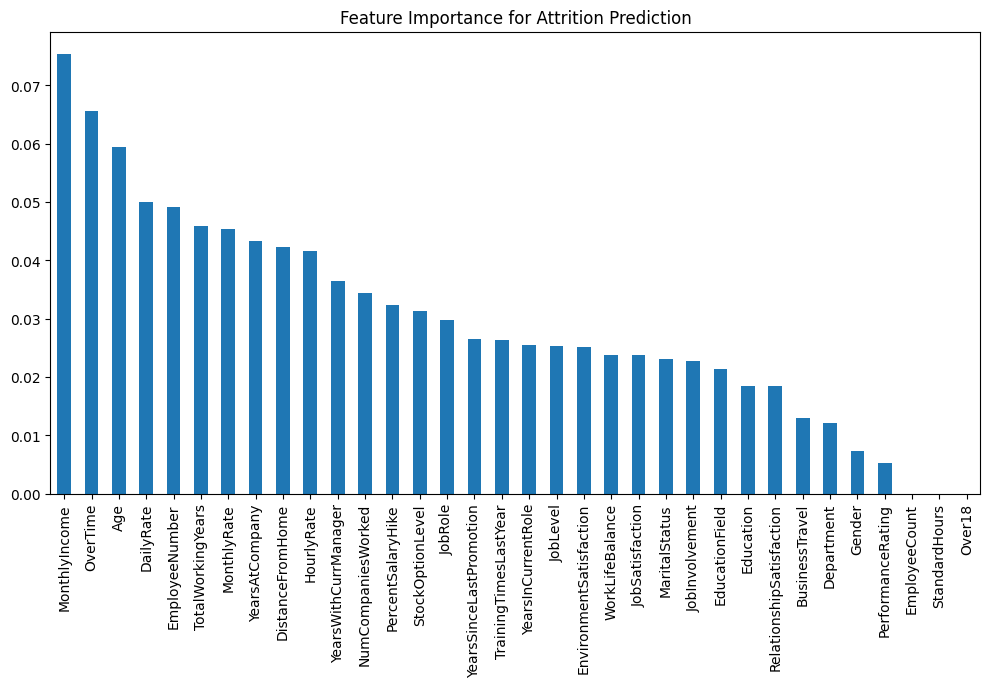

In [9]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance for Attrition Prediction")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

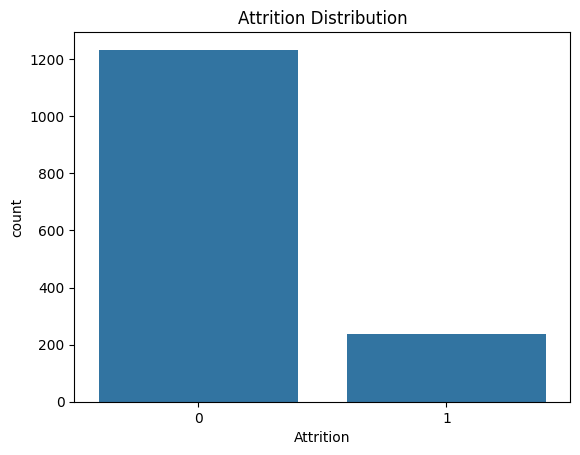

In [10]:
df.info()
df.describe()
df['Attrition'].value_counts()

# Example EDA visual
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()


In [12]:
attrition_counts = df['Attrition'].value_counts()
dept_attrition = df.groupby('Department')['Attrition'].value_counts().unstack().fillna(0)


In [13]:
!pip install jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00


In [15]:
!pip install dash
!pip install pyngrok


In [16]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [17]:
from pyngrok import ngrok


In [18]:
import dash
from dash import dcc, html
import plotly.express as px

# Dash app
app = dash.Dash(__name__)

# Data summary
attrition_counts = df['Attrition'].value_counts()
fig1 = px.pie(values=attrition_counts.values, names=attrition_counts.index, title='Overall Attrition Rate')

fig2 = px.box(df, x='Attrition', y='MonthlyIncome', title='Attrition vs Monthly Income')

# App layout
app.layout = html.Div([
    html.H1("HR Employee Attrition Dashboard"),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2)
])


In [22]:
!pip install gradio pandas scikit-learn

import gradio as gr
import pandas as pd

def predict_attrition(age, monthly_income, overtime):
    # Simple dummy logic
    if age < 30 and overtime == "Yes":
        return "Likely to leave"
    return "Likely to stay"

demo = gr.Interface(
    fn=predict_attrition,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Monthly Income"),
        gr.Radio(["Yes", "No"], label="OverTime")
    ],
    outputs="text",
    title="HR Attrition Predictor"
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0b308feeb45ed249cf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [1]:
pip install dash pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.0 MB/s eta 0:00:00


In [5]:
app.run(debug=True)


<IPython.core.display.Javascript object>